# Loan Feature Pipeline

In [2]:
import pandas as pd
import numpy as np

In [5]:
loans = pd.read_csv("loans.csv")

In [7]:
applicants = pd.read_csv("applicants.csv")

In [8]:
loans.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'issue_d', 'loan_status', 'purpose', 'title', 'address'],
      dtype='object')

In [9]:
applicants.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'id'],
      dtype='object')

In [11]:
loans.drop([ 'title', 'grade', 'address'], axis = 1, inplace = True)
applicants.drop(['emp_title', 'emp_length'],axis = 1, inplace = True)

In [13]:
applicants.columns

Index(['home_ownership', 'annual_inc', 'verification_status', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'id'],
      dtype='object')

In [14]:
df = pd.merge(loans, applicants, on='id', how='left')

In [15]:
df

,id,loan_amnt,term,int_rate,installment,sub_grade,issue_d,loan_status,purpose,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,0,10000.0,36 months,11.44,329.48,B4,Jan-2015,Fully Paid,vacation,RENT,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,1,8000.0,36 months,11.99,265.68,B5,Jan-2015,Fully Paid,debt_consolidation,MORTGAGE,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,2,15600.0,36 months,10.49,506.97,B3,Jan-2015,Fully Paid,credit_card,RENT,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,3,7200.0,36 months,6.49,220.65,A2,Nov-2014,Fully Paid,credit_card,RENT,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,4,24375.0,60 months,17.27,609.33,C5,Apr-2013,Charged Off,credit_card,MORTGAGE,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,396025,10000.0,60 months,10.99,217.38,B4,Oct-2015,Fully Paid,debt_consolidation,RENT,...,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,396026,21000.0,36 months,12.29,700.42,C1,Feb-2015,Fully Paid,debt_consolidation,MORTGAGE,...,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,396027,5000.0,36 months,9.99,161.32,B1,Oct-2013,Fully Paid,debt_consolidation,RENT,...,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0
396028,396028,21000.0,60 months,15.31,503.02,C2,Aug-2012,Fully Paid,debt_consolidation,MORTGAGE,...,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0


In [17]:
df.dtypes

id                        int64
loan_amnt               float64
term                     object
int_rate                float64
installment             float64
sub_grade                object
issue_d                  object
loan_status              object
purpose                  object
home_ownership           object
annual_inc              float64
verification_status      object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Mostrar las clases de cada variable categórica
for column in categorical_columns:
    unique_classes = df[column].unique()
    print(f"Variable: {column}")
    print(f"Clases: {unique_classes}")
    print("=" * 30)

Variable: term
Clases: [' 36 months' ' 60 months']
Variable: sub_grade
Clases: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
Variable: issue_d
Clases: ['Jan-2015' 'Nov-2014' 'Apr-2013' 'Sep-2015' 'Sep-2012' 'Oct-2014'
 'Apr-2012' 'Jun-2013' 'May-2014' 'Dec-2015' 'Apr-2015' 'Oct-2012'
 'Jul-2014' 'Feb-2013' 'Oct-2015' 'Jan-2014' 'Mar-2016' 'Apr-2014'
 'Jun-2011' 'Apr-2010' 'Jun-2014' 'Oct-2013' 'May-2013' 'Feb-2015'
 'Oct-2011' 'Jun-2015' 'Aug-2013' 'Feb-2014' 'Dec-2011' 'Mar-2013'
 'Jun-2016' 'Mar-2014' 'Nov-2013' 'Dec-2014' 'Apr-2016' 'Sep-2013'
 'May-2016' 'Jul-2015' 'Jul-2013' 'Aug-2014' 'May-2008' 'Mar-2010'
 'Dec-2013' 'Mar-2012' 'Mar-2015' 'Sep-2011' 'Jul-2012' 'Dec-2012'
 'Sep-2014' 'Nov-2012' 'Nov-2015' 'Jan-2011' 'May-2012' 'Feb-2016'
 'Jun-2012' 'Aug-2012' 'Jan-2016' 'May-2015' 'Oct-2016' 'Aug-2015'
 'Jul-2016' 'May-2009' 'Aug-2016' 'Jan-2012' '

Variable: initial_list_status
Clases: ['w' 'f']
Variable: application_type
Clases: ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']


In [18]:
df.describe()

,id,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,198014.500000,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,114324.157891,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,0.000000,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,99007.250000,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,198014.500000,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,297021.750000,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,396029.000000,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [21]:
df.drop(['id', 'issue_d','earliest_cr_line'], axis = 1, inplace = True)

In [44]:
df

,loan_amnt,term,int_rate,installment,sub_grade,loan_status,purpose,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B4,Fully Paid,vacation,RENT,117000.0,Not Verified,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B5,Fully Paid,debt_consolidation,MORTGAGE,65000.0,Not Verified,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B3,Fully Paid,credit_card,RENT,43057.0,Source Verified,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A2,Fully Paid,credit_card,RENT,54000.0,Not Verified,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C5,Charged Off,credit_card,MORTGAGE,55000.0,Verified,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B4,Fully Paid,debt_consolidation,RENT,40000.0,Source Verified,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36 months,12.29,700.42,C1,Fully Paid,debt_consolidation,MORTGAGE,110000.0,Source Verified,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36 months,9.99,161.32,B1,Fully Paid,debt_consolidation,RENT,56500.0,Verified,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0
396028,21000.0,60 months,15.31,503.02,C2,Fully Paid,debt_consolidation,MORTGAGE,64000.0,Verified,15.88,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0


In [67]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
sub_grade                object
loan_status              object
purpose                  object
home_ownership           object
annual_inc              float64
verification_status      object
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object

# Training Pipeline

### Train Test Split

In [45]:
# Dividir el DataFrame en características (X) y etiquetas (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [46]:
from sklearn.model_selection import train_test_split

# Realizar la separación en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Imprimir las dimensiones de los conjuntos resultantes
print("Dimensiones de conjuntos:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimensiones de conjuntos:
X_train: (316824, 19), y_train: (316824,)
X_test: (79206, 19), y_test: (79206,)


In [48]:
categorical_features = []
numeric_features = []
for col in X_train.columns:
    if X_train[col].dtype == object:
        categorical_features.append(col)
    else:
        numeric_features.append(col)

print(numeric_features)
print(categorical_features)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
['term', 'sub_grade', 'purpose', 'home_ownership', 'verification_status', 'initial_list_status', 'application_type']


In [49]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectPercentile, chi2

In [50]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [53]:
y_train = y_train.map({'Fully Paid': 1, 'Charged Off': 0})
y_test = y_test.map({'Fully Paid': 1, 'Charged Off': 0})

In [54]:
y_train

320024    1
282427    1
103275    1
199642    0
56027     1
         ..
259178    1
365838    0
131932    1
146867    1
121958    0
Name: loan_status, Length: 316824, dtype: int64

In [61]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [62]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")


In [63]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

clf.fit(X_train, y_train.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'mort_acc',
                                                   'pub_rec_bankruptcies']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000017C2FDE6A60>))]),
                                                  ['term', 'sub_grade',
                                                   'purpose', 'home_ownership',
                                                   'verification_status',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('classifier', LogisticRegression())])

In [64]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 80.59%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.553512       0.810565  0.805933       0.682039       0.760184
recall         0.050889       0.989993  0.805933       0.520441       0.805933
f1-score       0.093208       0.891339  0.805933       0.492274       0.734909
support    62096.000000  254728.000000  0.805933  316824.000000  316824.000000
_______________________________________________
Confusion Matrix: 
 [[  3160  58936]
 [  2549 252179]]

Test Result:
Accuracy Score: 80.45%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.533096      0.809411   0.80451      0.671254      0.755070
recall         0.048084      0.989690   0.80451      0.518887      0.804510
f1-score       0.088211      0.890518   0.80451      0.489

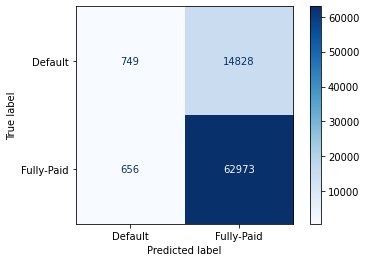

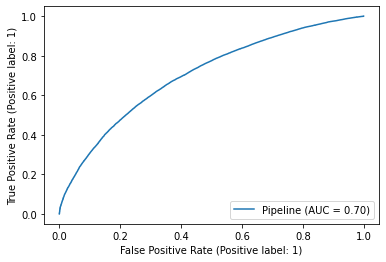

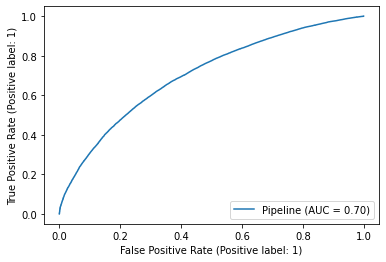

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

display = RocCurveDisplay.from_estimator(clf, X_test, y_test)
display.plot()

# Inference Pipeline

In [ ]:
"""
IMPORTACIONES:

import hopsworks
import pandas as pd
import joblib
import os
from sklearn.linear_model import LogisticRegression
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2

"""

In [69]:
loans_df = pd.read_csv('loans.csv')
applicants_df = pd.read_csv('applicants.csv')

df = pd.merge(loans_df, applicants_df, on='id', how='left')

df.drop([ 'title', 'grade', 'address','emp_title', 'emp_length', 'id', 'issue_d','earliest_cr_line'], axis = 1, inplace = True)

def format_dtypes(df):
    # Convertir las columnas específicas a tipos de datos deseados
    df['term'] = df['term'].astype(str)
    df['sub_grade'] = df['sub_grade'].astype(str)
    df['purpose'] = df['purpose'].astype(str)
    df['home_ownership'] = df['home_ownership'].astype(str)
    df['verification_status'] = df['verification_status'].astype(str)
    df['initial_list_status'] = df['initial_list_status'].astype(str)
    df['application_type'] = df['application_type'].astype(str)
    df['loan_status'] = df['loan_status'].astype(str)  # Mantener el mismo mapeo de 'loan_status' que en la función de referencia
                 
    # Convertir columnas numéricas específicas a float
    numeric_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
                       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
    df[numeric_columns] = df[numeric_columns].astype(float)
                 
    # Mapeo para 'churn' (loan_status) y conversión a str
    mapping = {'loan_status': {'Yes': 1, 'No': 0}}
    df.replace(mapping, inplace=True)
    df['loan_status'] = df['loan_status'].astype(str)
    return df
            
    df = format_dtypes(df)

In [70]:
df

,loan_amnt,term,int_rate,installment,sub_grade,loan_status,purpose,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B4,Fully Paid,vacation,RENT,117000.0,Not Verified,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B5,Fully Paid,debt_consolidation,MORTGAGE,65000.0,Not Verified,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B3,Fully Paid,credit_card,RENT,43057.0,Source Verified,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A2,Fully Paid,credit_card,RENT,54000.0,Not Verified,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C5,Charged Off,credit_card,MORTGAGE,55000.0,Verified,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B4,Fully Paid,debt_consolidation,RENT,40000.0,Source Verified,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36 months,12.29,700.42,C1,Fully Paid,debt_consolidation,MORTGAGE,110000.0,Source Verified,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36 months,9.99,161.32,B1,Fully Paid,debt_consolidation,RENT,56500.0,Verified,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0
396028,21000.0,60 months,15.31,503.02,C2,Fully Paid,debt_consolidation,MORTGAGE,64000.0,Verified,15.88,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0


In [73]:
test_path = 'C:/Users/diego/OneDrive/Escritorio/mlops_projects/mlops/loan_appro_ml_service/artifacts/test.csv'
train_path = 'C:/Users/diego/OneDrive/Escritorio/mlops_projects/mlops/loan_appro_ml_service/artifacts/train.csv'

In [84]:
def get_data_transformer_object():

            numerical_columns = ['loan_amnt','int_rate','installment','annual_inc',
                                 'dti','open_acc','pub_rec','revol_bal','revol_util','total_acc',
                                 'mort_acc','pub_rec_bankruptcies']
            categorical_columns = [
                'term','sub_grade','purpose', 'home_ownership','verification_status',
                'initial_list_status','application_type'
                ]

            num_pipeline = Pipeline(
                steps = [
                    ("imputer", SimpleImputer(strategy= "median")),
                    ("scaler", StandardScaler())
                ])
                
            cat_pipeline = Pipeline(
                steps=[
                    ("imputer", SimpleImputer(strategy= "most_frequent")),
                    ("one_hot_encoder", OneHotEncoder()),
                    ("scaler", StandardScaler(with_mean=False))
                ]
            )

            preprocessor = ColumnTransformer(
                [
                    ("num_pipeline", num_pipeline, numerical_columns),
                    ("cat_pipeline", cat_pipeline, categorical_columns)
                ]
            )
                 
            return preprocessor
            

In [101]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [102]:
train_df

,loan_amnt,term,int_rate,installment,sub_grade,purpose,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status
0,25000.0,36 months,8.39,787.92,A5,debt_consolidation,RENT,85000.0,Source Verified,11.03,9.0,0.0,17943.0,37.1,22.0,w,INDIVIDUAL,4.0,0.0,1
1,12000.0,36 months,7.89,375.43,A5,debt_consolidation,MORTGAGE,124000.0,Not Verified,10.82,14.0,0.0,23020.0,46.3,30.0,w,INDIVIDUAL,3.0,0.0,1
2,23200.0,60 months,13.99,539.71,C4,credit_card,MORTGAGE,140000.0,Source Verified,15.25,14.0,1.0,33270.0,53.5,41.0,w,INDIVIDUAL,2.0,0.0,1
3,16800.0,60 months,15.31,402.41,C2,debt_consolidation,MORTGAGE,82000.0,Source Verified,14.24,13.0,0.0,10634.0,72.3,40.0,f,INDIVIDUAL,2.0,0.0,0
4,18000.0,36 months,6.03,547.84,A1,debt_consolidation,RENT,220000.0,Source Verified,12.29,8.0,4.0,36989.0,60.5,12.0,w,INDIVIDUAL,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316819,20000.0,36 months,13.99,683.46,C4,debt_consolidation,MORTGAGE,60000.0,Source Verified,6.12,7.0,0.0,11131.0,74.2,20.0,w,INDIVIDUAL,1.0,0.0,1
316820,30000.0,60 months,22.95,844.86,F1,debt_consolidation,RENT,276000.0,Source Verified,5.12,8.0,0.0,17874.0,92.1,14.0,f,INDIVIDUAL,0.0,0.0,0
316821,15600.0,36 months,12.21,519.72,B5,debt_consolidation,RENT,50000.0,Not Verified,4.06,10.0,0.0,16594.0,55.3,26.0,f,INDIVIDUAL,NaN,0.0,1
316822,24525.0,36 months,17.14,876.10,D4,debt_consolidation,RENT,72000.0,Verified,32.05,13.0,1.0,12244.0,35.9,20.0,f,INDIVIDUAL,3.0,1.0,1


In [103]:
test_df

,loan_amnt,term,int_rate,installment,sub_grade,purpose,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status
0,14000.0,60 months,14.49,329.33,C4,debt_consolidation,MORTGAGE,80000.0,Source Verified,17.04,10.0,0.0,12223.0,63.7,16.0,w,INDIVIDUAL,2.0,0.0,0
1,6050.0,36 months,16.29,213.57,D2,debt_consolidation,OWN,20400.0,Verified,28.08,11.0,0.0,2577.0,13.3,24.0,f,INDIVIDUAL,0.0,0.0,1
2,20775.0,36 months,18.24,753.57,D5,other,RENT,65000.0,Source Verified,15.30,9.0,0.0,21872.0,36.5,10.0,f,INDIVIDUAL,0.0,0.0,1
3,6000.0,36 months,13.99,205.04,C4,credit_card,RENT,38848.0,Verified,16.59,17.0,4.0,6873.0,38.2,29.0,f,INDIVIDUAL,5.0,3.0,0
4,17450.0,36 months,13.11,588.89,B4,credit_card,MORTGAGE,65000.0,Not Verified,12.06,11.0,0.0,30557.0,47.8,31.0,f,INDIVIDUAL,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79201,20000.0,36 months,15.80,701.17,C3,debt_consolidation,RENT,95000.0,Source Verified,16.60,6.0,3.0,10908.0,86.6,11.0,w,INDIVIDUAL,0.0,1.0,0
79202,9800.0,36 months,7.69,305.70,A4,debt_consolidation,RENT,74000.0,Not Verified,14.53,7.0,0.0,11440.0,63.9,13.0,f,INDIVIDUAL,0.0,0.0,1
79203,11800.0,36 months,13.11,398.19,C2,debt_consolidation,RENT,76000.0,Not Verified,20.42,18.0,1.0,12764.0,44.3,29.0,f,INDIVIDUAL,NaN,1.0,1
79204,25000.0,60 months,7.89,505.60,A5,debt_consolidation,MORTGAGE,110000.0,Source Verified,18.56,8.0,0.0,21990.0,50.6,28.0,w,INDIVIDUAL,2.0,0.0,1


In [104]:
preprocessing_obj = get_data_transformer_object()

In [105]:
target_columns_name = "loan_status"

In [106]:
input_feature_train_df = train_df.drop(columns=[target_columns_name], axis = 1)
input_feature_train_df

,loan_amnt,term,int_rate,installment,sub_grade,purpose,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,25000.0,36 months,8.39,787.92,A5,debt_consolidation,RENT,85000.0,Source Verified,11.03,9.0,0.0,17943.0,37.1,22.0,w,INDIVIDUAL,4.0,0.0
1,12000.0,36 months,7.89,375.43,A5,debt_consolidation,MORTGAGE,124000.0,Not Verified,10.82,14.0,0.0,23020.0,46.3,30.0,w,INDIVIDUAL,3.0,0.0
2,23200.0,60 months,13.99,539.71,C4,credit_card,MORTGAGE,140000.0,Source Verified,15.25,14.0,1.0,33270.0,53.5,41.0,w,INDIVIDUAL,2.0,0.0
3,16800.0,60 months,15.31,402.41,C2,debt_consolidation,MORTGAGE,82000.0,Source Verified,14.24,13.0,0.0,10634.0,72.3,40.0,f,INDIVIDUAL,2.0,0.0
4,18000.0,36 months,6.03,547.84,A1,debt_consolidation,RENT,220000.0,Source Verified,12.29,8.0,4.0,36989.0,60.5,12.0,w,INDIVIDUAL,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316819,20000.0,36 months,13.99,683.46,C4,debt_consolidation,MORTGAGE,60000.0,Source Verified,6.12,7.0,0.0,11131.0,74.2,20.0,w,INDIVIDUAL,1.0,0.0
316820,30000.0,60 months,22.95,844.86,F1,debt_consolidation,RENT,276000.0,Source Verified,5.12,8.0,0.0,17874.0,92.1,14.0,f,INDIVIDUAL,0.0,0.0
316821,15600.0,36 months,12.21,519.72,B5,debt_consolidation,RENT,50000.0,Not Verified,4.06,10.0,0.0,16594.0,55.3,26.0,f,INDIVIDUAL,NaN,0.0
316822,24525.0,36 months,17.14,876.10,D4,debt_consolidation,RENT,72000.0,Verified,32.05,13.0,1.0,12244.0,35.9,20.0,f,INDIVIDUAL,3.0,1.0


In [107]:
input_feature_train_df_v2 = train_df.drop(columns=[target_columns_name])
input_feature_train_df_v2

,loan_amnt,term,int_rate,installment,sub_grade,purpose,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,25000.0,36 months,8.39,787.92,A5,debt_consolidation,RENT,85000.0,Source Verified,11.03,9.0,0.0,17943.0,37.1,22.0,w,INDIVIDUAL,4.0,0.0
1,12000.0,36 months,7.89,375.43,A5,debt_consolidation,MORTGAGE,124000.0,Not Verified,10.82,14.0,0.0,23020.0,46.3,30.0,w,INDIVIDUAL,3.0,0.0
2,23200.0,60 months,13.99,539.71,C4,credit_card,MORTGAGE,140000.0,Source Verified,15.25,14.0,1.0,33270.0,53.5,41.0,w,INDIVIDUAL,2.0,0.0
3,16800.0,60 months,15.31,402.41,C2,debt_consolidation,MORTGAGE,82000.0,Source Verified,14.24,13.0,0.0,10634.0,72.3,40.0,f,INDIVIDUAL,2.0,0.0
4,18000.0,36 months,6.03,547.84,A1,debt_consolidation,RENT,220000.0,Source Verified,12.29,8.0,4.0,36989.0,60.5,12.0,w,INDIVIDUAL,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316819,20000.0,36 months,13.99,683.46,C4,debt_consolidation,MORTGAGE,60000.0,Source Verified,6.12,7.0,0.0,11131.0,74.2,20.0,w,INDIVIDUAL,1.0,0.0
316820,30000.0,60 months,22.95,844.86,F1,debt_consolidation,RENT,276000.0,Source Verified,5.12,8.0,0.0,17874.0,92.1,14.0,f,INDIVIDUAL,0.0,0.0
316821,15600.0,36 months,12.21,519.72,B5,debt_consolidation,RENT,50000.0,Not Verified,4.06,10.0,0.0,16594.0,55.3,26.0,f,INDIVIDUAL,NaN,0.0
316822,24525.0,36 months,17.14,876.10,D4,debt_consolidation,RENT,72000.0,Verified,32.05,13.0,1.0,12244.0,35.9,20.0,f,INDIVIDUAL,3.0,1.0


In [108]:
# X and y in Train dataset
#input_feature_train_df = train_df.drop(columns=[target_columns_name])
target_feature_train_df = train_df[target_columns_name]

#X and y in Test dataset
input_feature_test_df = test_df.drop(columns=[target_columns_name], axis = 1)
target_feature_test_df = test_df[target_columns_name]

In [110]:
input_feature_train_arr = preprocessing_obj.fit_transform(input_feature_train_df)

In [120]:
input_feature_train_arr

<316824x77 sparse matrix of type '<class 'numpy.float64'>'
	with 6019656 stored elements in Compressed Sparse Row format>

In [121]:
np.array(target_feature_train_df)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [123]:
print(target_feature_train_arr.shape)  # Asegúrate de que las dimensiones sean coherentes
print(np.array(target_feature_train_df).shape)  # Asegúrate de que las dimensiones sean coherentes

if target_feature_train_arr.shape == np.array(target_feature_train_df).shape:
    train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_arr)]
    test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_arr)]
else:
    print("Dimension mismatch. Please verify the shapes of the target features.")

(316824,)
(316824,)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 316824

In [129]:
target_feature_train_arr = np.array(target_feature_train_df)
target_feature_test_arr = np.array(target_feature_test_df)

In [130]:
if input_feature_train_arr.shape[0] == target_feature_train_arr.shape[0]:
    train_arr = np.column_stack((input_feature_train_arr, target_feature_train_arr))
    test_arr = np.column_stack((input_feature_test_arr, target_feature_test_arr))
else:
    print("Dimension mismatch. Please verify the shapes of the target features.")

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 79206

In [115]:
train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 316824